# Project: Wrangling and Analyze Data

In [3]:
import pandas as pd
import numpy as np
import requests
import json

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [4]:
#Accessing the already downloaded twiiter_archive_enhanced.csv file
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
# Using the request module to download image_prediction.tsv file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [6]:
# Reading the image_predictions.tsv file into a DataFrame
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)
<p>Since I have not gotten my approval from Twitter for me to use the Twitter API, the tweet_json.txt has been downloaded directly from my Udacity classroom.</p>

In [7]:
#Extracting the tweet id, retweet count and favotite count from the tweet_json.txt file
tweet_id = []
retweet_count = []
favorite_count = []
with open('tweet_json.txt', 'r') as f:
    for line in f:
        data = json.loads(line)
        tweet_id.append(data['id'])
        retweet_count.append(data['retweet_count'])
        favorite_count.append(data['favorite_count'])

data_dict = {'tweet_id':tweet_id, 'retweet_count':retweet_count, 'favorite_count':favorite_count}
additional_info = pd.DataFrame(data_dict)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [8]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [10]:
additional_info

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
additional_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [14]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
twitter_archive[twitter_archive.rating_denominator!=10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [16]:
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Lola          10
Tucker        10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
an             7
Buddy          7
Daisy          7
Bailey         7
Toby           7
Stanley        6
Milo           6
Bella          6
Rusty          6
Jack           6
Jax            6
Leo            6
Scout          6
Oscar          6
Dave           6
Koda           6
Alfie          5
            ... 
Furzey         1
Cecil          1
Jonah          1
Glenn          1
Malikai        1
Zuzu           1
Spark          1
Travis         1
Jazzy          1
Franq          1
Shawwn         1
Pilot          1
Brudge         1
Mitch          1
Durg           1
Taz            1
Poppy          1
Carll          1
Bert           1
Mack           1
Grey           1
Carbon         1
Cheesy         1
Damon          1
Fwed           1
Mason          1
Adele          1
Naphaniel     

In [17]:
twitter_archive[twitter_archive.expanded_urls.isna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


### Quality issues
##### `twitter_archive` table
1. Retweets in the dataframe

2. Replies in the dataframe

3. Erroneous datatype for ***timestamp*** column 

4. Tweets without images

5. Html tag in the ***source*** column

6. Name of dogs labelled 'a','the' and 'an'

7. Inaccurate ***rating_denominator*** value

##### `Image_prediction` table
8. Some predictions are not dog breeds

### Tidiness issues
1. One variable in four columns (dog_stage)
2. **`Additional_info`** table to be part of **`twitter_archive`** table
3. Dog breed to be extracted from the **`image_prediction`** table and added to **`twitter_archive`** table

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [18]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
additional_info_clean = additional_info.copy()


### Quality Issue #1: Retweets in the dataframe
Since we only want ratings of original tweets without retweets or replies, all rows and columns that contains retweets will be dropped.

#### Define:
1. Select all rows with retweets.
2. Drop the selected rows.
3. Drop all columns with retweets information.

#### Code

##### Extracting all retweet rows

In [19]:
retweet = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.notna()]

##### Dropping the extracted retweet rows from the twitter_archive table

In [20]:
twitter_archive_clean.drop(retweet.index, inplace=True)

##### Dropping all retweet columns from the twitter_archive table

In [21]:
twitter_archive_clean.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], inplace=True)

#### Test

##### Checking if the rows were dropped

In [21]:
twitter_archive_clean.shape

(2175, 14)

### Quality Issue #2: Replies in the dataframe
Since we only want ratings of original tweets without retweets or replies, all rows and columns that contains replies to tweets will be dropped.

#### Define:
1. Select all rows with replies.
2. Drop the selected rows.
3. Drop all columns with reply information.

#### Code

##### Extracting all rows with replies to tweets

In [22]:
replies = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.notna()]

##### Dropping the extracted rows with replies to tweet from the twitter_archive table

In [23]:
twitter_archive_clean.drop(replies.index, inplace=True)

##### Dropping columns indicating replies to tweet from the twitter_archive table

In [24]:
twitter_archive_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id'], inplace=True)

#### Test

##### Checking if the rows were dropped

In [25]:
twitter_archive_clean.shape

(2097, 12)

In [26]:
# To check if the right columns have been dropped
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Quality Issue #3: Erroneous datatype for timestamp column

#### Define:
Convert timestamp column from `strings` to `datetime`

#### Code

##### Converting `timestamp` column from *string* to *datetime* datatype

In [27]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

#### Test

###### Confirming the datatype of `timestamp` column

In [28]:
twitter_archive_clean.timestamp.dtype

dtype('<M8[ns]')

In [29]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


### Quality Issue #4: Tweets without images
We only want tweets with images

#### Define:
1. Select all rows without image.
2. Drop the selected rows.

#### Code

###### Extracting all tweets/rows without images

In [30]:
t_withoutimages = twitter_archive_clean[twitter_archive_clean.expanded_urls.isna()]

###### Dropping the extracted rows

In [31]:
twitter_archive_clean.drop(t_withoutimages.index, inplace=True)

#### Test

###### Checking if the rows without images have been dropped

In [32]:
twitter_archive_clean[twitter_archive_clean.expanded_urls.isna()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [33]:
twitter_archive_clean.expanded_urls.isna().sum()

0

### Quality Issue #5: HTML tag in the source column

#### Define:
Extract the link from the html tag then reassign it to the source column

#### Code

In [34]:
# Extracting the links from the source column as reassigning to the source column
twitter_archive_clean.source = twitter_archive_clean.source.str.split('\"', expand=True)[1]

#### Test

###### Confirming if the links was reassigned to the source column

In [35]:
twitter_archive_clean.source

0       http://twitter.com/download/iphone
1       http://twitter.com/download/iphone
2       http://twitter.com/download/iphone
3       http://twitter.com/download/iphone
4       http://twitter.com/download/iphone
5       http://twitter.com/download/iphone
6       http://twitter.com/download/iphone
7       http://twitter.com/download/iphone
8       http://twitter.com/download/iphone
9       http://twitter.com/download/iphone
10      http://twitter.com/download/iphone
11      http://twitter.com/download/iphone
12      http://twitter.com/download/iphone
13      http://twitter.com/download/iphone
14      http://twitter.com/download/iphone
15      http://twitter.com/download/iphone
16      http://twitter.com/download/iphone
17      http://twitter.com/download/iphone
18      http://twitter.com/download/iphone
20      http://twitter.com/download/iphone
21      http://twitter.com/download/iphone
22      http://twitter.com/download/iphone
23      http://twitter.com/download/iphone
24      htt

In [36]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Quality Issue #6: Name of dogs labelled 'a','the' and 'an'

#### Define: Name of dogs labelled 'a'
Select all rows with name '**a**'
Search the text column to check if the dog's name is available and reassign and if not assign None

#### Code

###### Viewing rows with name of dog labelled 'a'

In [37]:
twitter_archive_clean[twitter_archive_clean.name == 'a']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,2017-07-02 15:32:16,http://twitter.com/download/iphone,Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,2016-10-31 02:17:31,http://twitter.com/download/iphone,Here is a perfect example of someone who has t...,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,2016-09-04 23:46:12,http://twitter.com/download/iphone,Guys this is getting so out of hand. We only r...,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,2016-06-28 20:14:22,http://twitter.com/download/iphone,This is a mighty rare blue-tailed hammer sherk...,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,2016-06-28 15:40:07,http://twitter.com/download/iphone,Viewer discretion is advised. This is a terrib...,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,2016-06-26 01:08:52,http://twitter.com/download/iphone,This is a carrot. We only rate dogs. Please on...,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,2016-06-15 23:24:09,http://twitter.com/download/iphone,This is a very rare Great Alaskan Bush Pupper....,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,2016-04-06 02:21:30,http://twitter.com/download/iphone,People please. This is a Deadly Mediterranean ...,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,2016-04-01 02:51:22,http://twitter.com/download/iphone,This is a taco. We only rate dogs. Please only...,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,2016-03-02 02:43:09,http://twitter.com/download/iphone,Here is a heartbreaking scene of an incredible...,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [38]:
# Checking the text column to see if the name of the dog was given
twitter_archive_clean[twitter_archive_clean.name == 'a'].text.values

array([ 'Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF',
       'Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq',
       'Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn',
       'This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW',
       'Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R',
       'This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2',
       'This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/1

At a glance of the the text colum of our data with dogs have their names as "a", we will notice some of the dogs have names, we will need to extract the name for those dogs and reassign it to the name column while the others are assigned **None** to indicate their names were not given

In [39]:
# Extracting rows with names as "a"
names_a = twitter_archive_clean[twitter_archive_clean.name == 'a']

In [40]:
# Extracting the text column for dogs that actually have names from name_a
omitted_n = names_a[names_a.text.str.contains('named ')]['text']

In [41]:
# Getting the name of the dogs and assigning it to values
values = omitted_n.str.split('named ', expand=True)[1].str.split(' ',expand=True)[0].str[:-1]

In [42]:
# Reassign the name of the dogs
twitter_archive_clean.loc[omitted_n.index, 'name'] = values

In [43]:
names_a = twitter_archive_clean[twitter_archive_clean.name == 'a']

In [44]:
#Assign others with the value "none"
twitter_archive_clean.loc[names_a.index, 'name'] = 'None'

#### Test

##### Checking if there are still rows with name labelled 'a'

In [45]:
twitter_archive_clean[twitter_archive_clean.name == 'a']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define: Name of dogs labelled 'the'
Select all rows with name '**the**'
Search the text column to check if the dog's name is available and reassign and if not assign None

#### Code

###### Viewing rows with name of dog labelled 'the'

In [46]:
twitter_archive_clean[twitter_archive_clean.name == 'the']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1527,690360449368465409,2016-01-22 02:28:52,http://twitter.com/download/iphone,Stop sending in lobsters. This is the final wa...,https://twitter.com/dog_rates/status/690360449...,9,10,the,None,None,None,None
1603,685943807276412928,2016-01-09 21:58:42,http://twitter.com/download/iphone,This is the newly formed pupper a capella grou...,https://twitter.com/dog_rates/status/685943807...,8,10,the,None,None,pupper,None
1797,677269281705472000,2015-12-16 23:29:14,http://twitter.com/download/iphone,This is the happiest pupper I've ever seen. 10...,https://twitter.com/dog_rates/status/677269281...,10,10,the,None,None,pupper,None
1815,676613908052996102,2015-12-15 04:05:01,http://twitter.com/download/iphone,This is the saddest/sweetest/best picture I've...,https://twitter.com/dog_rates/status/676613908...,12,10,the,None,None,None,None
2037,671561002136281088,2015-12-01 05:26:34,http://twitter.com/download/iphone,This is the best thing I've ever seen so sprea...,https://twitter.com/dog_rates/status/671561002...,13,10,the,None,None,None,None
2212,668587383441514497,2015-11-23 00:30:28,http://vine.co,Never forget this vine. You will not stop watc...,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,None,None,None
2345,666063827256086533,2015-11-16 01:22:45,http://twitter.com/download/iphone,This is the happiest dog you will ever see. Ve...,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None
2346,666058600524156928,2015-11-16 01:01:59,http://twitter.com/download/iphone,Here is the Rand Paul of retrievers folks! He'...,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None


In [47]:
# Check the text column to see if the name of the dog was given
twitter_archive_clean[twitter_archive_clean.name == 'the'].text.values

array([ 'Stop sending in lobsters. This is the final warning. We only rate dogs. Thank you... 9/10 https://t.co/B9ZXXKJYNx',
       "This is the newly formed pupper a capella group. They're just starting out but I see tons of potential. 8/10 for all https://t.co/wbAcvFoNtn",
       "This is the happiest pupper I've ever seen. 10/10 would trade lives with https://t.co/ep8ATEJwRb",
       "This is the saddest/sweetest/best picture I've been sent. 12/10 😢🐶 https://t.co/vQ2Lw1BLBF",
       "This is the best thing I've ever seen so spread it like wildfire &amp; maybe we'll find the genius who created it. 13/10 https://t.co/q6RsuOVYwU",
       'Never forget this vine. You will not stop watching for at least 15 minutes. This is the second coveted.. 13/10 https://t.co/roqIxCvEB3',
       'This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK',
       "Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lo

At a glance of the the text colum of our data with dogs have their names as "the", we can notice that the dogs name were not actually given. it will be better to reassign the value **None** to indicate that their names were not given.

In [48]:
# Extract rows with names as "the"
names_the = twitter_archive_clean[twitter_archive_clean.name == 'the']

In [49]:
#Assign others with the value "None"
twitter_archive_clean.loc[names_the.index, 'name'] = 'None'

#### Test

##### Checking if there are still rows with name labelled 'the'

In [50]:
twitter_archive_clean[twitter_archive_clean.name == 'the']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define: Name of dogs labelled 'an'
Select all rows with name '**an**'
Search the text column to check if the dog's name is available and reassign and if not assign None

#### Code

###### Viewing rows with name of dog labelled 'an'

In [51]:
twitter_archive_clean[twitter_archive_clean.name == 'an']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1025,746369468511756288,2016-06-24 15:48:42,http://twitter.com/download/iphone,This is an Iraqi Speed Kangaroo. It is not a d...,https://twitter.com/dog_rates/status/746369468...,9,10,an,None,None,None,None
1362,703041949650034688,2016-02-26 02:20:37,http://twitter.com/download/iphone,This is an East African Chalupa Seal. We only ...,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
2204,668636665813057536,2015-11-23 03:46:18,http://twitter.com/download/iphone,This is an Irish Rigatoni terrier named Berta....,https://twitter.com/dog_rates/status/668636665...,10,10,an,None,None,None,None
2333,666337882303524864,2015-11-16 19:31:45,http://twitter.com/download/iphone,This is an extremely rare horned Parthenon. No...,https://twitter.com/dog_rates/status/666337882...,9,10,an,None,None,None,None
2335,666287406224695296,2015-11-16 16:11:11,http://twitter.com/download/iphone,This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
2349,666051853826850816,2015-11-16 00:35:11,http://twitter.com/download/iphone,This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None


In [52]:
# Check the text column to see if the name of the dog was given
twitter_archive_clean[twitter_archive_clean.name == 'an'].text.values

array([ "This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10 https://t.co/5qpBTTpgUt",
       'This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR',
       'This is an Irish Rigatoni terrier named Berta. Completely made of rope. No eyes. Quite large. Loves to dance. 10/10 https://t.co/EM5fDykrJg',
       'This is an extremely rare horned Parthenon. Not amused. Wears shoes. Overall very nice. 9/10 would pet aggressively https://t.co/QpRjllzWAL',
       'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv',
       "This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc"], dtype=object)

From the above text, only the row with index **2204** has the name of the dog given. The name of the dog will be extracted and reassigned while others will be assigned the value **None**

In [53]:
# Assign 'Berta' as name for index 2204
twitter_archive_clean.loc[2204, 'name'] = 'Berta'

In [54]:
# Extract rows with names as "an"
names_an = twitter_archive_clean[twitter_archive_clean.name == 'an']
# Assign others with the value "None"
twitter_archive_clean.loc[names_an.index, 'name'] = 'None'

#### Test

##### Checking if there are still rows with name labelled 'an'

In [55]:
twitter_archive_clean[twitter_archive_clean.name == 'an']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [56]:
# Checking if the issues have been corrected
twitter_archive_clean.name.value_counts()

None       649
Charlie     11
Lucy        11
Cooper      10
Oliver      10
Tucker       9
Penny        9
Sadie        8
Lola         8
Winston      8
Toby         7
Daisy        7
Stanley      6
Jax          6
Bo           6
Bella        6
Oscar        6
Koda         6
Bailey       6
Milo         5
Chester      5
Leo          5
Bentley      5
Scout        5
Dave         5
Louis        5
Buddy        5
Rusty        5
Reggie       4
Derek        4
          ... 
Betty        1
Chuq         1
Shiloh       1
Bungalo      1
Grey         1
Pablo        1
Jazzy        1
Astrid       1
Monster      1
Mack         1
Maisey       1
Joey         1
Ike          1
Pipsy        1
Hector       1
Nico         1
Fiji         1
Kawhi        1
Travis       1
Franq        1
Shawwn       1
Pilot        1
Logan        1
Brudge       1
Mitch        1
Durg         1
Taz          1
Poppy        1
Carll        1
Bloop        1
Name: name, Length: 969, dtype: int64

### Quality Issue #7: Inaccurate rating_denominator value
The correct denominator for our rating is **10**

#### Define:
Extract all rows with `rating_denominator` not equal to **10**


#### Code

In [57]:
# Extract all rows with rating_denominator not equal to 10
ina_den = twitter_archive_clean[twitter_archive_clean.rating_denominator != 10]

In [58]:
# Serach the text column to check if the actual ratng is available
ina_den.text.str.find('/10')

433      -1
516      -1
902      -1
1068    108
1120     -1
1165     29
1202     90
1228     -1
1254     -1
1274     -1
1351     -1
1433     -1
1635     -1
1662    112
1779     -1
1843     -1
2335    109
Name: text, dtype: int64

Only rows 1068,1165, 1202, 1662 and 2335 have actual ratings. Therefore, the actual numerator and denominator rating for this 5 rows can be done manually.

In [59]:
# Use the index of the rows that have ratings with '/10' to cahnge the numerator
twitter_archive_clean.loc[1068,'rating_numerator'] = int(twitter_archive_clean.loc[1068,'text'][106:108])
twitter_archive_clean.loc[1165,'rating_numerator'] = int(twitter_archive_clean.loc[1165,'text'][27:29])
twitter_archive_clean.loc[1202,'rating_numerator'] = int(twitter_archive_clean.loc[1202,'text'][88:90])
twitter_archive_clean.loc[1662,'rating_numerator'] = int(twitter_archive_clean.loc[1662,'text'][110:112])
twitter_archive_clean.loc[2335,'rating_numerator'] = int(twitter_archive_clean.loc[2335,'text'][107:109])

In [60]:
# Also change the denominator to rating to 10
twitter_archive_clean.loc[[1068,1165,1202,1662,2335],'rating_denominator'] = 10

In [61]:
# Viewing rows with rating denominator not equal to 10
twitter_archive_clean[twitter_archive_clean.rating_denominator != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40,http://twitter.com/download/iphone,The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23,http://twitter.com/download/iphone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57,http://twitter.com/download/iphone,Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54,http://twitter.com/download/iphone,Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02,http://twitter.com/download/iphone,Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,2016-03-18 02:46:49,http://twitter.com/download/iphone,Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,2016-03-14 02:04:08,http://twitter.com/download/iphone,"From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1351,704054845121142784,2016-02-28 21:25:30,http://twitter.com/download/iphone,Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60,50,None,None,None,None,None
1433,697463031882764288,2016-02-10 16:51:59,http://twitter.com/download/iphone,Happy Wednesday here's a bucket of pups. 44/40...,https://twitter.com/dog_rates/status/697463031...,44,40,None,None,None,None,None
1635,684222868335505415,2016-01-05 04:00:18,http://twitter.com/download/iphone,Someone help the girl is being mugged. Several...,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None


We can notice that the other ratings are in multiples of 10 except for row 516 which had no ratings at all. Since we want tweets with ratings, row 516 will be dropped

In [62]:
# Dropping Index 516
twitter_archive_clean.drop(index=516, inplace=True)

In [63]:
# Extracting rows with rating denominator not equal to 10
ina_den = twitter_archive_clean[twitter_archive_clean.rating_denominator != 10]

In [64]:
# Get the original numerator ratings by dividing numerator/(denominator/10)
twitter_archive_clean.loc[ina_den.index, 'rating_numerator'] = twitter_archive_clean.loc[ina_den.index, 'rating_numerator']/(twitter_archive_clean.loc[ina_den.index, 'rating_denominator']/10)

In [65]:
# Also change the denominator to rating to 10
twitter_archive_clean.loc[ina_den.index,'rating_denominator'] = 10

#### Test

###### Checking if there are still rows with rating denominator not equal to 10

In [66]:
twitter_archive_clean[twitter_archive_clean.rating_denominator != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


###### Confirming if the rating denominator column is 10

In [67]:
twitter_archive_clean.rating_denominator.unique()

array([10])

#### Converting the rating_numerator column to integer

In [68]:
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype(int)

In [69]:
#Confirm if the change was effected
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2093 non-null int64
timestamp             2093 non-null datetime64[ns]
source                2093 non-null object
text                  2093 non-null object
expanded_urls         2093 non-null object
rating_numerator      2093 non-null int64
rating_denominator    2093 non-null int64
name                  2093 non-null object
doggo                 2093 non-null object
floofer               2093 non-null object
pupper                2093 non-null object
puppo                 2093 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 292.6+ KB


### Quality Issue #8: Some predictions are not dog breeds
From the image prediction table, some of the predictions are not dog breeds. It necessary for those rows to be dropped

#### Define:
Serach for rows where the 3 predictions are False then drop them

#### Code

In [70]:
# Extract rows with p1_dog, p2_dog and p3_dog as False
img_false = image_predictions_clean[(image_predictions_clean.p1_dog==False) & (image_predictions_clean.p2_dog==False) & (image_predictions_clean.p3_dog==False)]

# Drop row in img_false
image_predictions_clean.drop(img_false.index, inplace=True)

#### Test

In [71]:
# Checking if there are still rows with predictions that doesn't indicate a Dog breed
image_predictions_clean[(image_predictions_clean.p1_dog==False) & (image_predictions_clean.p2_dog==False) & (image_predictions_clean.p3_dog==False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Tidiness Issue #1: One variable in four columns (dog_stage)

#### Define:
Create a function that will search the text column to know the dog stage of each dog in the tweet.
If the dog stage is not indicated, it will be assigned None.
Then delete the columns (doggo, floofer, pupper and puppo) which indicates the dog stage

#### Code

###### Creating a function to get the dog stage

In [72]:
# Function to know the dog stage
def dog_stages(x):
    x = x.lower()
    if 'puppo' in x:
        return 'puppo'
    elif 'pupper' in x:
        return 'pupper'
    elif 'floofer' in x:
        return 'floofer'
    elif 'doggo'in x:
        return 'doggo'
    else: return 'None'

In [73]:
#Create a new column dog_stage
twitter_archive_clean['dog_stage'] = twitter_archive_clean.text.apply(dog_stages)

# Drop columns doggo, floofer, pupper and puppo
twitter_archive_clean.drop(columns=['doggo','floofer','pupper','puppo'], inplace=True)

#### Test

###### Checking if the new column was added

In [74]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2093 non-null int64
timestamp             2093 non-null datetime64[ns]
source                2093 non-null object
text                  2093 non-null object
expanded_urls         2093 non-null object
rating_numerator      2093 non-null int64
rating_denominator    2093 non-null int64
name                  2093 non-null object
dog_stage             2093 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 243.5+ KB


### Tidiness Issue #2: `Additional_info` table to be part of `twitter_archive` table

#### Define:
Merge `additional_info` to `twitter_archive`

#### Code

###### Merging `additional_info` table to `twitter_archive` table

In [75]:
twitter_archive_clean = twitter_archive_clean.merge(additional_info_clean, how='left', on='tweet_id')

#### Test

###### Checking if the 2 tables were merged

In [76]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2092
Data columns (total 11 columns):
tweet_id              2093 non-null int64
timestamp             2093 non-null datetime64[ns]
source                2093 non-null object
text                  2093 non-null object
expanded_urls         2093 non-null object
rating_numerator      2093 non-null int64
rating_denominator    2093 non-null int64
name                  2093 non-null object
dog_stage             2093 non-null object
retweet_count         2093 non-null int64
favorite_count        2093 non-null int64
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 196.2+ KB


### Tidiness Issue #3: Dog breed to be extracted from the `image_prediction` table and added to `twitter_archive` table

#### Define:
1. Define a function that extracts the dog breed from *`image_perdiction`* table and creates a new Dataframe with `tweet_id` and `dog_breed`
2. Merge the newly created DataFrame to *`twitter_archive`* table

#### Code

###### Creating a function to extract Dog's breed

In [77]:
# Create a function to extract dog breed
def dog_breeds(d):
    dog_list = []
    for i, j in d.iterrows():
        if j['p1_dog'] == True:
            dog_list.append((j['tweet_id'],j['p1']))
        elif j['p2_dog'] == True:
            dog_list.append((j['tweet_id'],j['p2']))
        else: dog_list.append((j['tweet_id'],j['p3']))
    return pd.DataFrame(dog_list, columns=['tweet_id','dog_breed'])

In [78]:
# Call the dog_breeds() function and use image_predictions as the parameter to create a new DataFrame
dog_breed = dog_breeds(image_predictions_clean)

#### Test

###### View the first 5 rows of the new Dataframe `dog_breed`

In [79]:
dog_breed.head()

,tweet_id,dog_breed
0,666020888022790149,Welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,German_shepherd
3,666044226329800704,Rhodesian_ridgeback
4,666049248165822465,miniature_pinscher


#### Code

In [80]:
# Merge dog_breed table to twitter_archive_clean table
twitter_archive_clean = twitter_archive_clean.merge(dog_breed, how='left', on='tweet_id')

#### Test

###### Checking if the 2 tables were merged

In [81]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2092
Data columns (total 12 columns):
tweet_id              2093 non-null int64
timestamp             2093 non-null datetime64[ns]
source                2093 non-null object
text                  2093 non-null object
expanded_urls         2093 non-null object
rating_numerator      2093 non-null int64
rating_denominator    2093 non-null int64
name                  2093 non-null object
dog_stage             2093 non-null object
retweet_count         2093 non-null int64
favorite_count        2093 non-null int64
dog_breed             1665 non-null object
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 212.6+ KB


###### Viewing the first 5 rows of the merged table

In [82]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,dog_breed
0,892420643555336193,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,8853,39467,NaN
1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,6514,33819,Chihuahua
2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,4328,25461,Chihuahua
3,891689557279858688,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,8964,42908,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,9774,41048,basset


In [83]:
# Replacing all missing dog_breed with None
twitter_archive_clean.dog_breed.fillna(value='None', inplace=True)

#### Test

###### Confirming all missing values have been resolved

In [84]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2092
Data columns (total 12 columns):
tweet_id              2093 non-null int64
timestamp             2093 non-null datetime64[ns]
source                2093 non-null object
text                  2093 non-null object
expanded_urls         2093 non-null object
rating_numerator      2093 non-null int64
rating_denominator    2093 non-null int64
name                  2093 non-null object
dog_stage             2093 non-null object
retweet_count         2093 non-null int64
favorite_count        2093 non-null int64
dog_breed             2093 non-null object
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 212.6+ KB


###### Viewing the cleaned Dataset

In [85]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,dog_breed
0,892420643555336193,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,8853,39467,None
1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,6514,33819,Chihuahua
2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,4328,25461,Chihuahua
3,891689557279858688,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,8964,42908,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,9774,41048,basset


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [86]:
# Storing our cleaned twitter_archive as twitter_archive_master.csv for further analysis
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [87]:
# Creating a Datafrom from the saved twitter_archive_master.csv
df = pd.read_csv('twitter_archive_master.csv')

In [88]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,dog_breed
0,892420643555336193,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,8853,39467,None
1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,6514,33819,Chihuahua
2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,4328,25461,Chihuahua
3,891689557279858688,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,8964,42908,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,9774,41048,basset


In [89]:
# To view the details of each column in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Data columns (total 12 columns):
tweet_id              2093 non-null int64
timestamp             2093 non-null object
source                2093 non-null object
text                  2093 non-null object
expanded_urls         2093 non-null object
rating_numerator      2093 non-null int64
rating_denominator    2093 non-null int64
name                  2093 non-null object
dog_stage             2093 non-null object
retweet_count         2093 non-null int64
favorite_count        2093 non-null int64
dog_breed             2093 non-null object
dtypes: int64(5), object(7)
memory usage: 196.3+ KB


In [90]:
# Accessing the top 10 rating
df.sort_values(by=['rating_numerator'], ascending=False)[:10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,dog_breed
767,749981277374128128,2016-07-04 15:00:45,https://about.twitter.com/products/tweetdeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,2772,5569,None
1817,670842764863651840,2015-11-29 05:52:33,http://twitter.com/download/iphone,After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,4324,7989,None
526,786709082849828864,2016-10-13 23:23:56,http://twitter.com/download/iphone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,7069,20296,Pomeranian
583,778027034220126208,2016-09-20 00:24:34,http://twitter.com/download/iphone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,pupper,1885,7320,clumber
1470,680494726643068929,2015-12-25 21:06:00,http://twitter.com/download/iphone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,pupper,542,1879,kuvasz
333,821407182352777218,2017-01-17 17:21:47,http://twitter.com/download/iphone,This is Sundance. He's a doggo drummer. Even s...,https://twitter.com/dog_rates/status/821407182...,14,10,Sundance,doggo,5053,13075,Irish_setter
666,762035686371364864,2016-08-06 21:20:40,http://twitter.com/download/iphone,This left me speechless. 14/10 heckin heroic a...,https://twitter.com/dog_rates/status/762035686...,14,10,None,None,17919,35400,None
172,851464819735769094,2017-04-10 16:00:07,http://twitter.com/download/iphone,This is Iggy. He was a rescue dog killed in th...,https://twitter.com/dog_rates/status/851464819...,14,10,Iggy,None,7855,25944,None
318,824025158776213504,2017-01-24 22:44:42,http://twitter.com/download/iphone,"""I wish we were dogs"" 14/10 for @BadlandsNPS h...",https://twitter.com/badlandsnps/status/8239662...,14,10,None,None,679,5255,None
475,794205286408003585,2016-11-03 15:51:10,http://twitter.com/download/iphone,This is Laika. She was a space pupper. The fir...,https://twitter.com/dog_rates/status/794205286...,14,10,Laika,pupper,3895,10314,None


In [91]:
# Top 10 Average Rating of Dog breeds.
df.query('dog_breed != "None"').groupby('dog_breed')['rating_numerator'].mean().sort_values(ascending=False)[:10]

dog_breed
clumber                 27.000000
Bouvier_des_Flandres    13.000000
Pomeranian              12.536585
Saluki                  12.500000
briard                  12.333333
Tibetan_mastiff         12.250000
Border_terrier          12.142857
standard_schnauzer      12.000000
silky_terrier           12.000000
Gordon_setter           11.750000
Name: rating_numerator, dtype: float64

In [92]:
# Top 10 Average likes of Dog breeds.
df.query('dog_breed != "None"').groupby('dog_breed')['favorite_count'].mean().sort_values(ascending=False)[:10]

dog_breed
Saluki                     24060.000000
Bedlington_terrier         21153.166667
French_bulldog             18416.806452
Bouvier_des_Flandres       18032.000000
Afghan_hound               17326.666667
black-and-tan_coonhound    17012.000000
flat-coated_retriever      16791.625000
Irish_water_spaniel        16400.000000
Leonberg                   14934.333333
English_springer           14138.300000
Name: favorite_count, dtype: float64

In [93]:
# Top 10 Average retweet of Dog breeds.
df.query('dog_breed != "None"').groupby('dog_breed')['retweet_count'].mean().sort_values(ascending=False)[:10]

dog_breed
Bedlington_terrier    7510.166667
Afghan_hound          5976.000000
standard_poodle       5508.909091
English_springer      5401.600000
Saluki                5133.750000
French_bulldog        5039.677419
cocker_spaniel        4858.100000
Samoyed               4843.952381
whippet               4840.272727
Great_Pyrenees        4533.866667
Name: retweet_count, dtype: float64

In [94]:
# Getting the tweet with the maximum dog rating
df[df.rating_numerator == df.rating_numerator.max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,dog_breed
767,749981277374128128,2016-07-04 15:00:45,https://about.twitter.com/products/tweetdeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,2772,5569,None


In [95]:
# Getting the proportion of tweets with ratings above 10
len(df[df.rating_numerator >= 10])/df.shape[0]

0.800764452938366

In [96]:
# Top 10 tweets with the most likes
df.sort_values(by=['favorite_count'], ascending=False)[:10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,dog_breed
324,822872901745569793,2017-01-21 18:26:02,http://twitter.com/download/iphone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,None,puppo,48265,132810,Lakeland_terrier
822,744234799360020481,2016-06-18 18:26:18,http://twitter.com/download/iphone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,79515,131075,Labrador_retriever
60,879415818425184262,2017-06-26 19:07:24,http://twitter.com/download/iphone,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,None,45849,107956,English_springer
417,807106840509214720,2016-12-09 06:17:20,http://twitter.com/download/iphone,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,None,56625,107015,Chihuahua
115,866450705531457537,2017-05-22 00:28:40,http://twitter.com/download/iphone,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,pupper,32883,106827,French_bulldog
349,819004803107983360,2017-01-11 02:15:36,http://twitter.com/download/iphone,This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,42228,95450,standard_poodle
99,870374049280663552,2017-06-01 20:18:38,http://twitter.com/download/iphone,This is Zoey. She really likes the planet. Wou...,https://twitter.com/dog_rates/status/870374049...,13,10,Zoey,None,27680,85011,golden_retriever
419,806629075125202948,2016-12-07 22:38:52,http://twitter.com/download/iphone,"""Good afternoon class today we're going to lea...",https://twitter.com/dog_rates/status/806629075...,13,10,None,None,37911,75639,cocker_spaniel
141,859196978902773760,2017-05-02 00:04:57,http://twitter.com/download/iphone,We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,25661,75193,malamute
861,739238157791694849,2016-06-04 23:31:25,http://twitter.com/download/iphone,Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13,10,None,doggo,52360,75163,Eskimo_dog


In [97]:
# Top 10 tweets with the most retweets
df.sort_values(by=['retweet_count'], ascending=False)[:10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,dog_breed
822,744234799360020481,2016-06-18 18:26:18,http://twitter.com/download/iphone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,79515,131075,Labrador_retriever
417,807106840509214720,2016-12-09 06:17:20,http://twitter.com/download/iphone,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,None,56625,107015,Chihuahua
861,739238157791694849,2016-06-04 23:31:25,http://twitter.com/download/iphone,Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13,10,None,doggo,52360,75163,Eskimo_dog
324,822872901745569793,2017-01-21 18:26:02,http://twitter.com/download/iphone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,None,puppo,48265,132810,Lakeland_terrier
60,879415818425184262,2017-06-26 19:07:24,http://twitter.com/download/iphone,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,None,45849,107956,English_springer
349,819004803107983360,2017-01-11 02:15:36,http://twitter.com/download/iphone,This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,42228,95450,standard_poodle
419,806629075125202948,2016-12-07 22:38:52,http://twitter.com/download/iphone,"""Good afternoon class today we're going to lea...",https://twitter.com/dog_rates/status/806629075...,13,10,None,None,37911,75639,cocker_spaniel
669,761672994376806400,2016-08-05 21:19:27,http://twitter.com/download/iphone,Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...,https://twitter.com/dog_rates/status/761672994...,10,10,None,None,33421,55016,None
115,866450705531457537,2017-05-22 00:28:40,http://twitter.com/download/iphone,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,pupper,32883,106827,French_bulldog
1586,676219687039057920,2015-12-14 01:58:31,http://twitter.com/download/iphone,This is Kenneth. He's stuck in a bubble. 10/10...,https://twitter.com/dog_rates/status/676219687...,10,10,Kenneth,None,31989,67100,whippet


### Insights:
1. About 80% of the tweets have ratings above 10.

2. Bedlington terrier dog breed has the most average retweet of 7510.

3. Saluki dog breed has the most average like of 24060.

4. The Dog with the most retweet is a Labrador retriever.

5. The Dog with the most like is a Lakeland terrier.

5. The clumber dog breed had the highest average rating.

### Visualization

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

##### Plotting a chart to view the Top 10 tweets with the most retweets

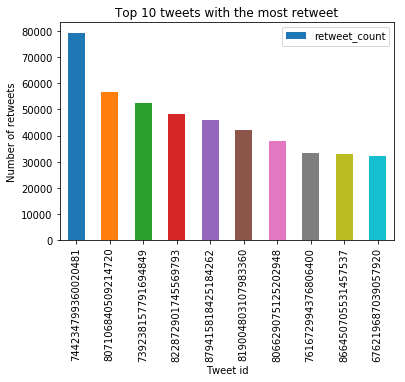

In [99]:
# A chart to show Top 10 tweets with most retweets
rt = df.sort_values(by=['retweet_count'], ascending=False)[:10]
rt.plot('tweet_id', 'retweet_count', kind='bar')
plt.xlabel('Tweet id')
plt.ylabel('Number of retweets')
plt.title('Top 10 tweets with the most retweet');

##### Plotting a chart to view the Top 10 tweets with the most likes

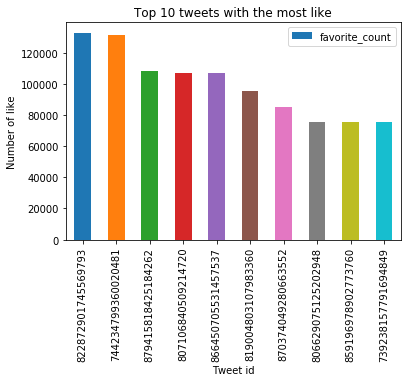

In [100]:
# A chart to show Top 10 tweets with most likes
likes = df.sort_values(by=['favorite_count'], ascending=False)[:10]
likes.plot('tweet_id', 'favorite_count', kind='bar')
plt.xlabel('Tweet id')
plt.ylabel('Number of like')
plt.title('Top 10 tweets with the most like');

##### Plotting a chart to view the Top 10 Dog breeds with the most average rating

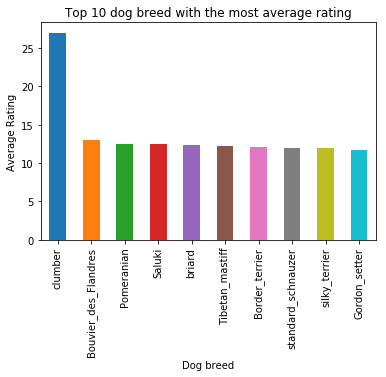

In [101]:
# A chart to show Top 10 dog breeds with the most average rating
a_rating = df.query('dog_breed != "None"').groupby('dog_breed')['rating_numerator'].mean().sort_values(ascending=False)[:10]
a_rating.plot(kind='bar')
plt.xlabel('Dog breed')
plt.ylabel('Average Rating')
plt.title('Top 10 dog breed with the most average rating');

##### Plotting a chart to view the Top 10 Dog breeds with the most average retweets

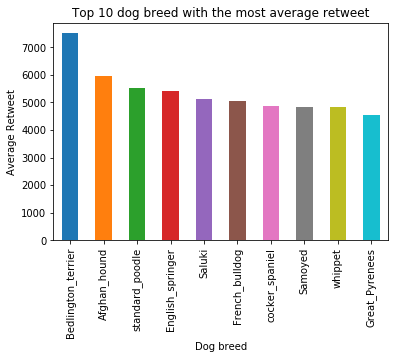

In [102]:
# A chart to show Top 10 dog breeds with the most average retweets
a_retweet = df.query('dog_breed != "None"').groupby('dog_breed')['retweet_count'].mean().sort_values(ascending=False)[:10]
a_retweet.plot(kind='bar')
plt.xlabel('Dog breed')
plt.ylabel('Average Retweet')
plt.title('Top 10 dog breed with the most average retweet');

##### Plotting a chart to view the Top 10 Dog breeds with the most average likes

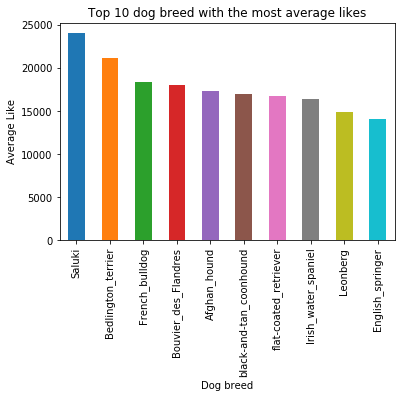

In [103]:
# A chart to show Top 10 dog breeds with the most average likes
a_like = df.query('dog_breed != "None"').groupby('dog_breed')['favorite_count'].mean().sort_values(ascending=False)[:10]
a_like.plot(kind='bar')
plt.xlabel('Dog breed')
plt.ylabel('Average Like')
plt.title('Top 10 dog breed with the most average likes');